In [21]:
import os
from glob import glob

import pandas as pd

from PIL import Image

import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport

### Orthonet

In [10]:
# Variables
base_folder = f"data{os.sep}orthonet"
data_folder = f"{base_folder}{os.sep}orthonet data{os.sep}orthonet data"

# Functions
def display_image(image_path):
    # Read the image using PIL
    img = Image.open(image_path)
    
    # Create a figure
    plt.figure(figsize=(10, 8))
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f"Image: {os.path.basename(image_path)}")
    plt.show()

In [11]:
ortho = pd.read_csv(f"{base_folder}{os.sep}train.csv")
ortho.head()

,filenames,labels,patient_id,masks,valid_mask
0,0004_11_08_R0002_UNIL.png,Hip_SmithAndNephew_Polarstem_NilCol,4,0004_11_08_R0002_MASK.png,True
1,0004_32_22_1_A-P00_UNIL.png,Knee_SmithAndNephew_GenesisII,4,0004_32_22_1_A-P00_MASK.png,False
2,0006_32_22_2_A-P00_UNIL.png,Knee_SmithAndNephew_GenesisII,6,0006_32_22_2_A-P00_MASK.png,False
3,0006_32_22_2_A-P02_UNIL.png,Knee_SmithAndNephew_GenesisII,6,0006_32_22_2_A-P02_MASK.png,False
4,0007_32_22_1_A-P00_UNIL.png,Knee_SmithAndNephew_GenesisII,7,0007_32_22_1_A-P00_MASK.png,False


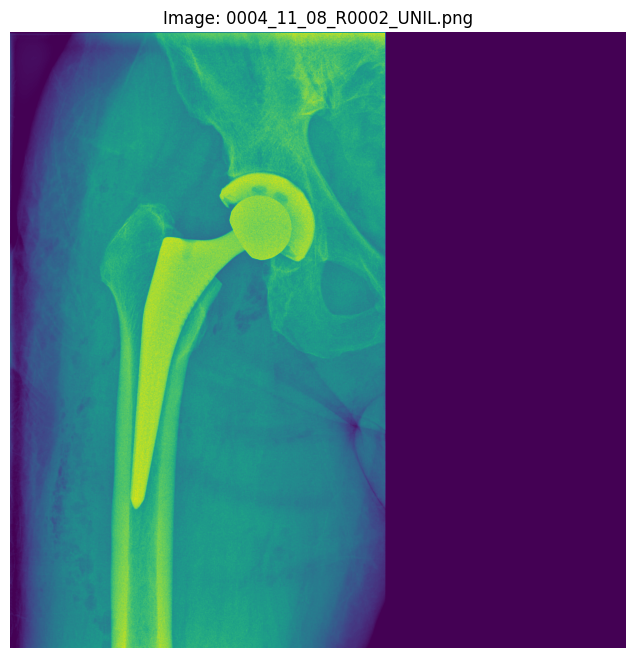

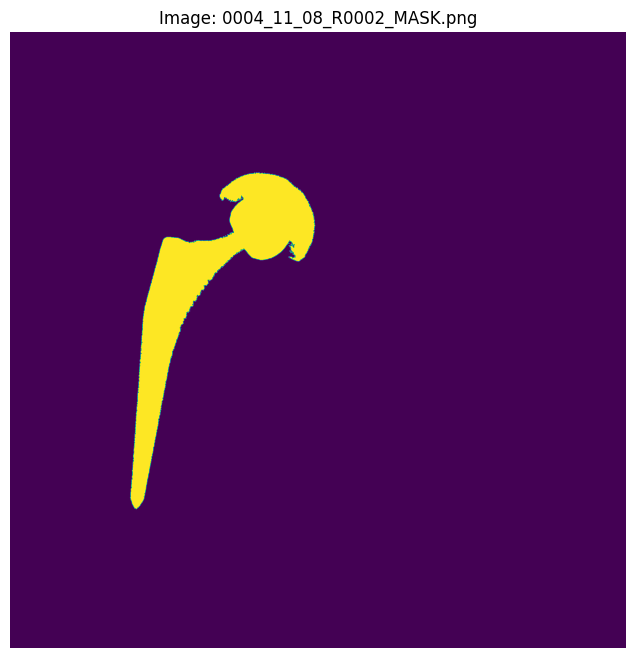

In [13]:
image = f"{data_folder}{os.sep}0004_11_08_R0002_UNIL.png"
display_image(image)

mask = f"{data_folder}{os.sep}0004_11_08_R0002_MASK.png"
display_image(mask)

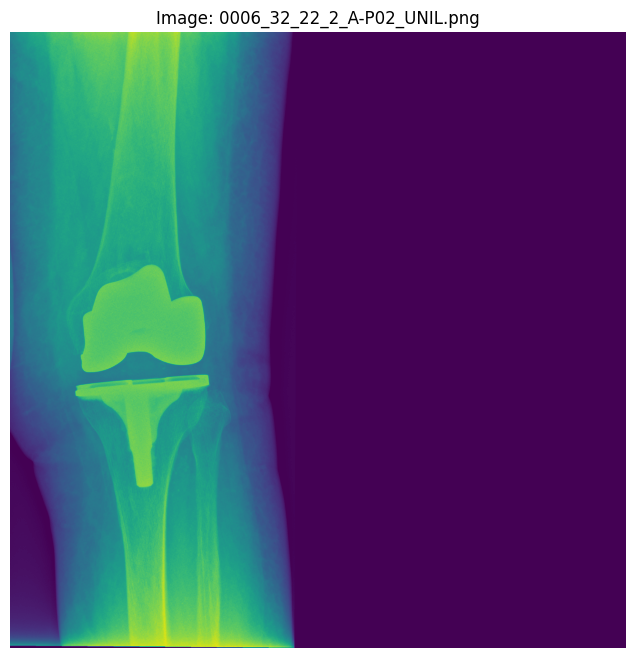

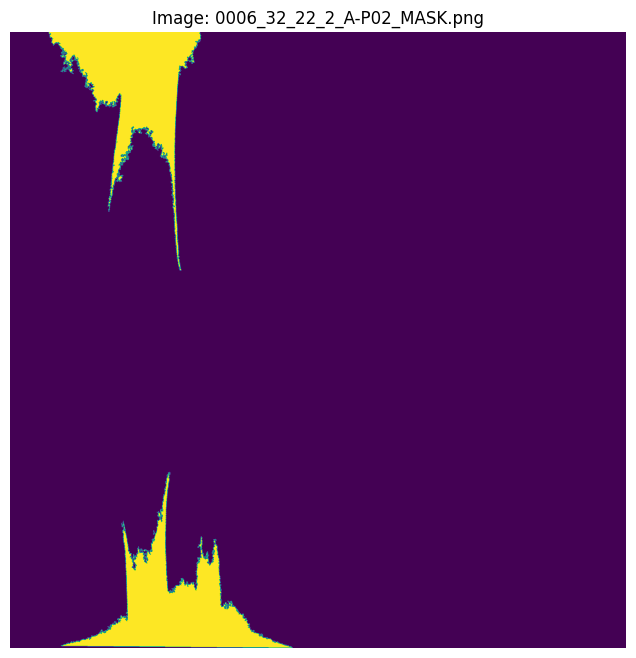

In [14]:
image = f"{data_folder}{os.sep}0006_32_22_2_A-P02_UNIL.png"
display_image(image)

mask = f"{data_folder}{os.sep}0006_32_22_2_A-P02_MASK.png"
display_image(mask)

In [17]:
profile_report = ProfileReport(ortho, title="OrthoNet Data Profiling Report")
profile_report

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


In [20]:
list(ortho['labels'].unique())

['Hip_SmithAndNephew_Polarstem_NilCol',
 'Knee_SmithAndNephew_GenesisII',
 'Hip_Stryker_Exeter',
 'Knee_Depuy_Synthes_Sigma',
 'Hip_DepuySynthes_Corail_Collar',
 'Hip_DepuySynthes_Corail_NilCol',
 'Hip_SmithAndNephew_Anthology',
 'Hip_JRIOrtho_FurlongEvolution_Collar',
 'Knee_SmithAndNephew_Legion2',
 'Hip_Stryker_AccoladeII',
 'Hip_JRIOrtho_FurlongEvolution_NilCol',
 'Knee_ZimmerBiomet_Oxford']

### Pacemakers

In [30]:
base_folder = f"data{os.sep}pacemakers"
train_folder = f"{base_folder}{os.sep}Train"

# Create DataFrame
pacemaker = pd.DataFrame()
for folder in glob(f"{train_folder}{os.sep}*"):
    label, version = os.path.basename(folder).split(' - ')
    for file in glob(f"{folder}{os.sep}*"):
        file = os.path.basename(file)
        pacemaker = pd.concat([pacemaker, pd.DataFrame([{
            'image_path': file,
            'labels': label,
            'versions': version
        }])], ignore_index=True)
pacemaker = pacemaker.reset_index(drop=True)
pacemaker.head()

,image_path,labels,versions
0,IMP1508004.JPG,BIO,Actros_Philos
1,IMP1510020.JPG,BIO,Actros_Philos
2,IMP1510023.JPG,BIO,Actros_Philos
3,IMP1513015.JPG,BIO,Actros_Philos
4,IMP1513048.JPG,BIO,Actros_Philos


In [37]:
for i, row in pacemaker \
                .groupby(["labels", "versions"]) \
                .count() \
                .reset_index() \
                [["labels", "versions"]].iterrows():
    # print(f"{i+1}. {row['labels']} - {row['versions']}")
    print(f"Manufacturer: {row['labels']} and Model Name: {row['versions']};")

Manufacturer: BIO and Model Name: Actros_Philos;
Manufacturer: BIO and Model Name: Cyclos;
Manufacturer: BIO and Model Name: Evia;
Manufacturer: BOS and Model Name: Altrua_Insignia;
Manufacturer: BOS and Model Name: Autogen_Teligen_Energen_Cognis;
Manufacturer: BOS and Model Name: Contak Renewal 4;
Manufacturer: BOS and Model Name: Contak Renewal TR2;
Manufacturer: BOS and Model Name: ContakTR_Discovery_Meridian_Pulsar Max;
Manufacturer: BOS and Model Name: Emblem;
Manufacturer: BOS and Model Name: Ingenio;
Manufacturer: BOS and Model Name: Proponent;
Manufacturer: BOS and Model Name: Ventak Prizm;
Manufacturer: BOS and Model Name: Visionist;
Manufacturer: BOS and Model Name: Vitality;
Manufacturer: MDT and Model Name: AT500;
Manufacturer: MDT and Model Name: Adapta_Kappa_Sensia_Versa;
Manufacturer: MDT and Model Name: Advisa;
Manufacturer: MDT and Model Name: Azure;
Manufacturer: MDT and Model Name: C20_T20;
Manufacturer: MDT and Model Name: C60 DR;
Manufacturer: MDT and Model Name: C